# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

plt.style.use("ggplot")

# Reading and displaying dataset

In [2]:
df = pd.read_csv('Video_games_esrb_rating.csv')
print(f'df shape: {df.shape}')
df.head()

df shape: (1895, 34)


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Viewing all the columns of the dataset

In [3]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

# Data Cleaning

We drop all rows that have no_descriptors == 0 and all other values also == 0. These are incorrect datapoints, as for rows with all values == 0, the no_descriptor column should be == 1. 

In [4]:
cpy = df.copy()
cpy = cpy[cpy["no_descriptors"] == 0]
cpy.drop(columns=["no_descriptors", "title", "esrb_rating"], inplace=True)

temp = cpy.sum(axis=1).sort_values()
temp = temp[temp == 0].index
df.loc[temp]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
1265,Old Man's Journey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
639,Everybody's Golf VR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1507,Pop-Up Pilgrims,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
536,Harvest Moon: Mad Dash,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
322,Cooking Mama: Cookstar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
543,The Angry Birds Movie 2 VR: Under Pressure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [5]:
df.drop(labels=temp, axis=0, inplace=True)
index = [x for x in range(len(df.index))]
df.reindex(index=index)
pass

In [6]:
df = df.rename(columns={"strong_janguage": "strong_language"})

Checking for NULL or NaN values

In [7]:
print(f"Number of NaN values = {df[df.isna().any(axis=1)].shape[0]}")

Number of NaN values = 0


In [8]:
print(f"Number of NULL values = {df[df.isnull().any(axis=1)].shape[0]}")

Number of NULL values = 0


In [ ]:
df.to_csv("cleaned_data.csv")

# Correlation Matrix

<AxesSubplot:>

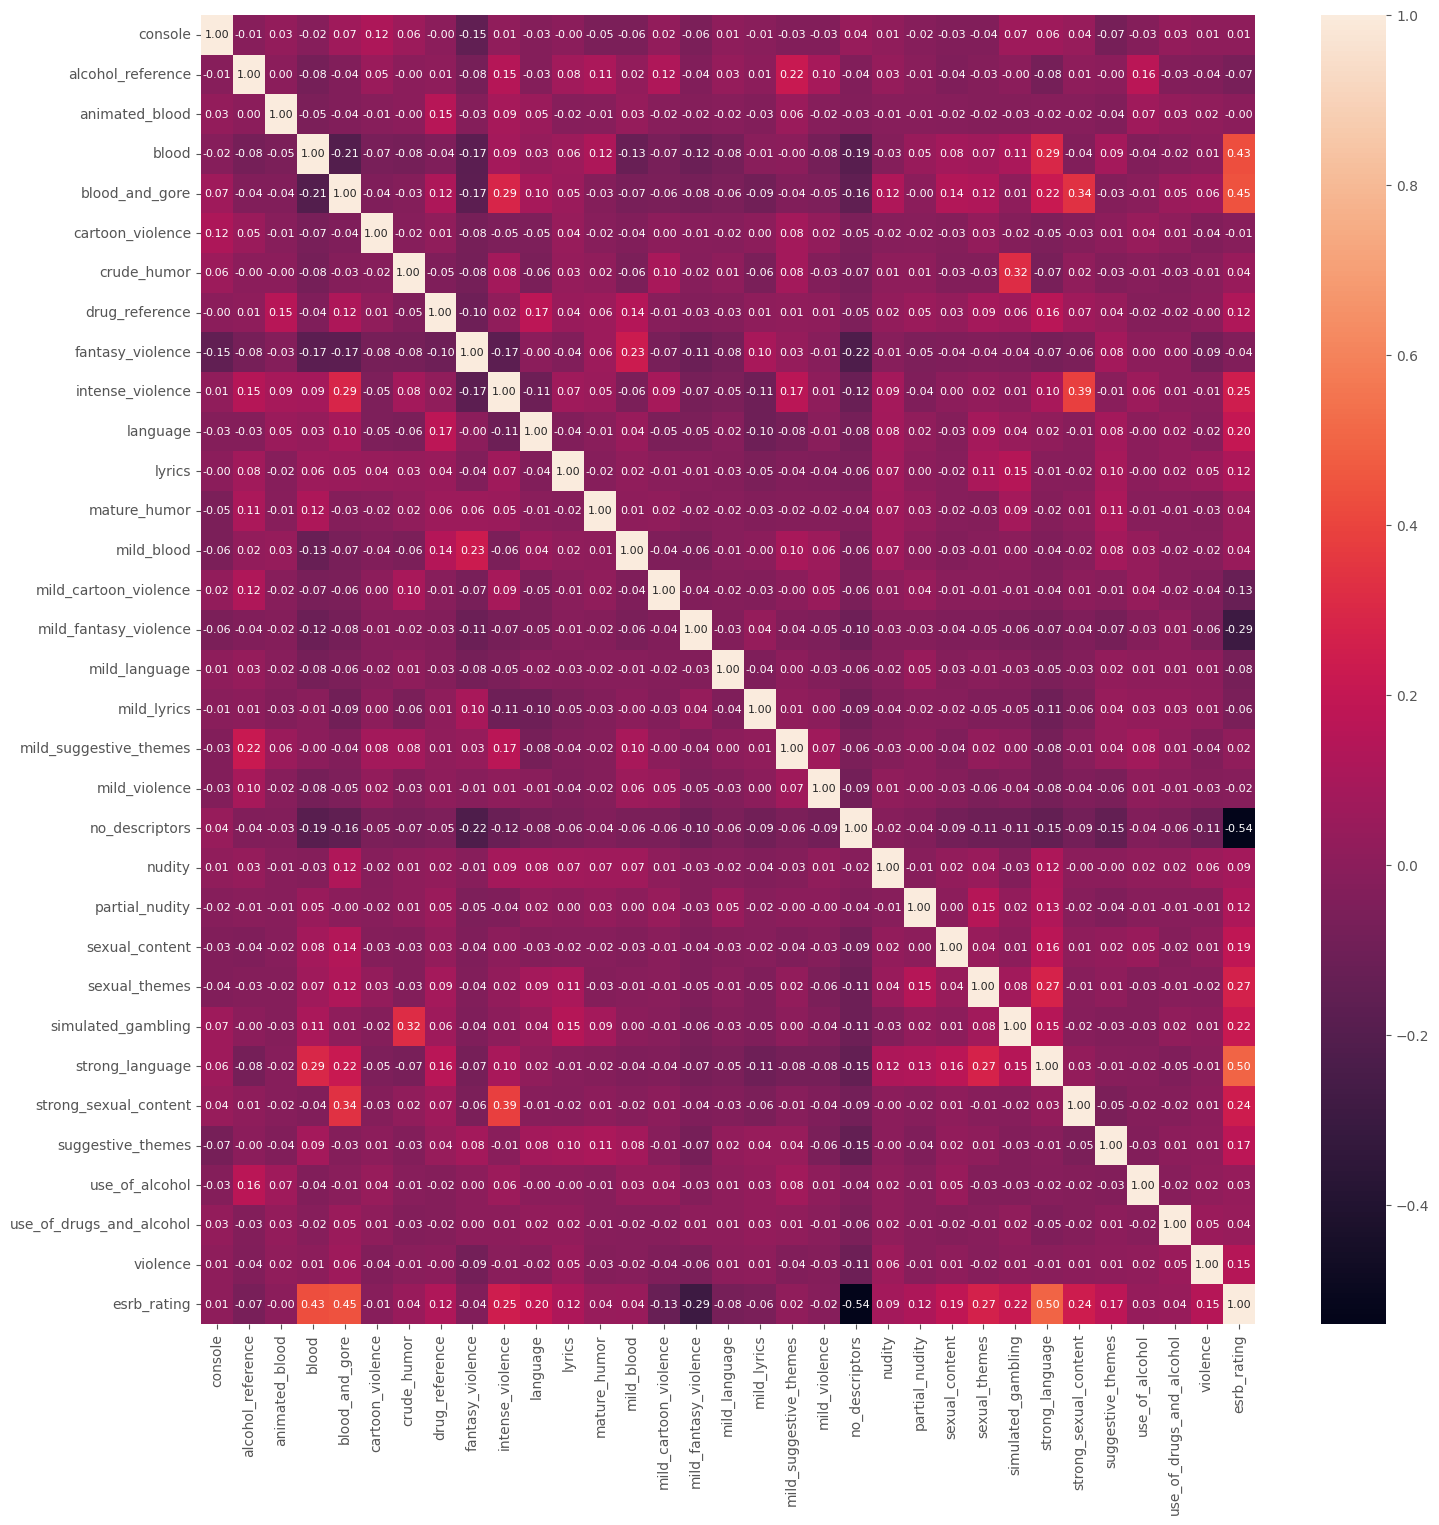

In [15]:
fig, ax = plt.subplots(figsize=(17, 17))
c = df.copy()
c.esrb_rating = c.esrb_rating.replace({"E": 0, "ET": 1, "T": 2, "M": 3})

sns.heatmap(
    c.drop(columns=['title']).corr(),
    annot=True,
    ax=ax,
    annot_kws={"fontsize": 8},
    fmt=".2f")


# Pie charts 

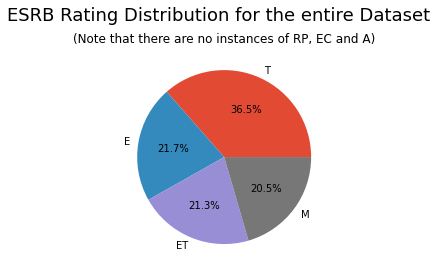

In [99]:
plt.pie(df["esrb_rating"].value_counts(),
        labels=df["esrb_rating"].value_counts().index, autopct='%1.1f%%')
plt.title("(Note that there are no instances of RP, EC and A)", fontsize=12)
plt.suptitle("ESRB Rating Distribution for the entire Dataset",
             fontsize=18, y=1.025)
plt.show()


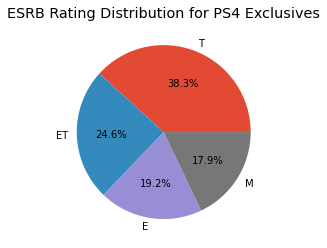

In [100]:
ps4_exclusives = df[df["console"] == 0]
plt.pie(ps4_exclusives["esrb_rating"].value_counts(
), labels=ps4_exclusives["esrb_rating"].value_counts().index, autopct='%1.1f%%')
plt.title("ESRB Rating Distribution for PS4 Exclusives")
plt.show()


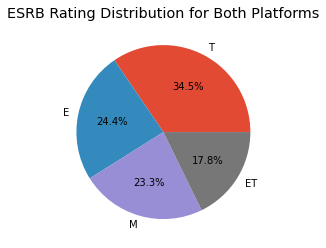

In [101]:
both_platforms = df[df["console"] == 1]
plt.pie(both_platforms["esrb_rating"].value_counts(
), labels=both_platforms["esrb_rating"].value_counts().index, autopct='%1.1f%%')
plt.title("ESRB Rating Distribution for Both Platforms")
plt.show()


# Counts for each column for each rating

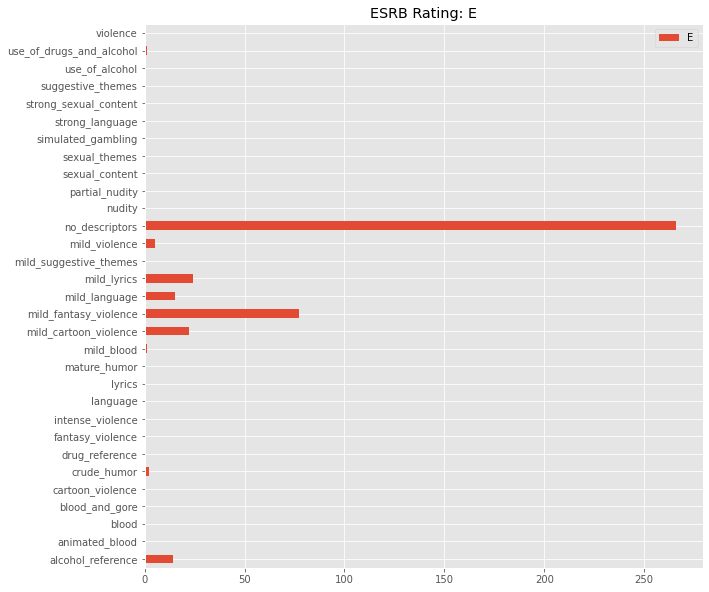

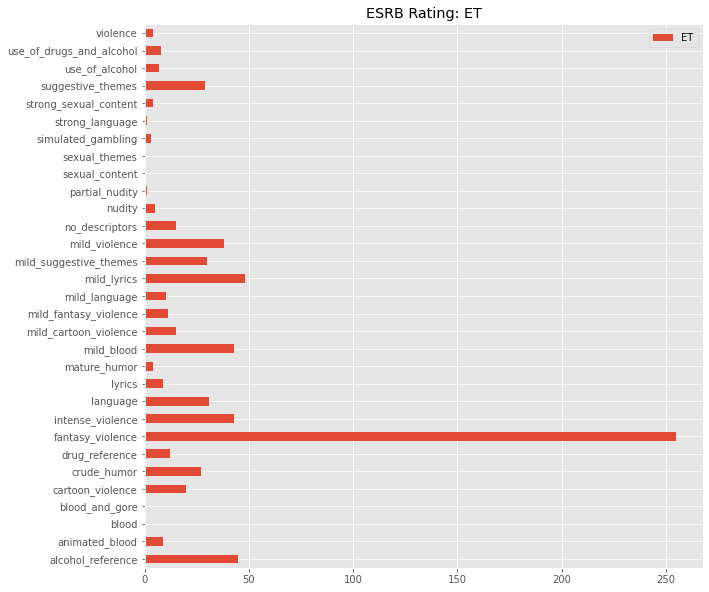

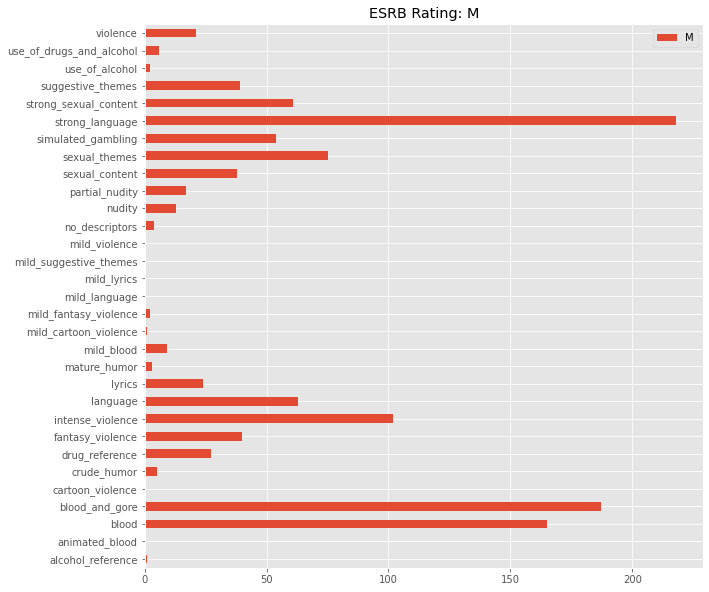

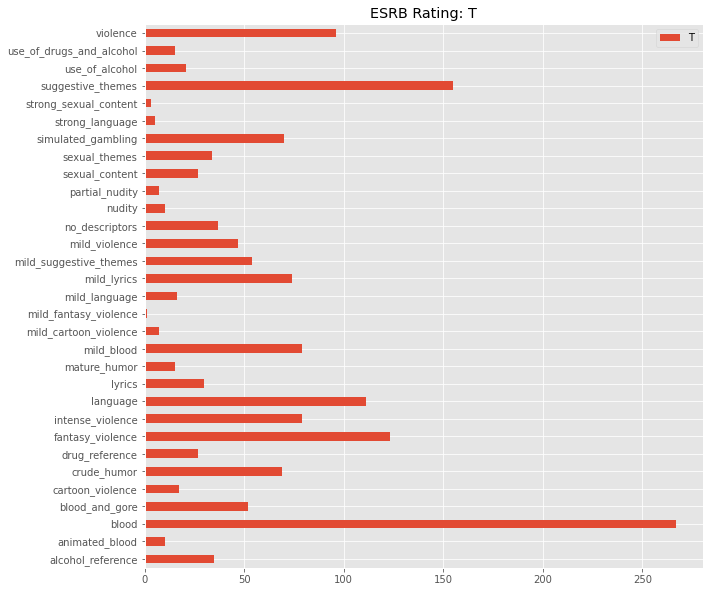

In [102]:
temp = df.copy()
# temp = temp.pivot_table(index="esrb_rating", columns=["blood"], aggfunc="count")
temp = temp.groupby("esrb_rating").apply(lambda x : x.sum()).drop(columns=["esrb_rating", "console", "title"])
temp_cols = temp.index
for val in temp_cols:
    stats = temp.loc[val].to_frame()
    fig, ax = plt.subplots(figsize=(10, 10))
    stats.plot(kind="barh", title=f"ESRB Rating: {val}", ax=ax)
    obj = (stats.index[np.argmax(stats.values)], np.max(stats.values), val)